In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [2]:
df = pd.read_csv("dataset/marks_dataset.csv")

In [3]:
df.head()

,test1,test2,admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Data: classes
feature 1: marks of test 1 <br>
feature 2: marks of test 2 <br>

outcome variable: 1(admission given) / 0(no admission)

## considering only two features since it is easy to visualize in 2D

In [4]:
X = df[["test1", "test2"]].values

In [5]:
X.shape

(100, 2)

In [6]:
y = df["admission"].values

## Class distribution

In [7]:
Counter(y)

Counter({0: 40, 1: 60})

In [8]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=222)

In [9]:
print(x_train.shape, y_train.shape)

(80, 2) (80,)


In [10]:
print(x_val.shape, y_val.shape)

(20, 2) (20,)


![title](notebook_images/knn_gif.gif)

In [11]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

y_preds = knn.predict(x_val)
y_preds_train = knn.predict(x_train)

print("validation accuracy", accuracy_score(y_val, y_preds))
print("training accuracy", accuracy_score(y_train, y_preds_train))

validation accuracy 0.9
training accuracy 0.9375


## Validation accuracy for values of K ranging from 1 to 10

In [12]:
train_accuracy = []
val_accuracy = []

for i in range(1, 10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    
    y_preds = knn.predict(x_val)
    y_preds_train = knn.predict(x_train)
    
    val_accuracy.append(accuracy_score(y_val, y_preds))
    train_accuracy.append(accuracy_score(y_train, y_preds_train))

Text(0, 0.5, 'Val accuracy')

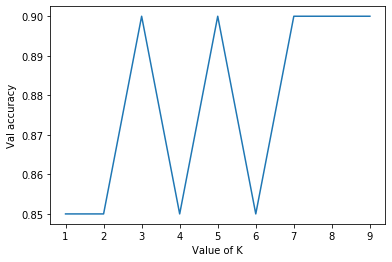

In [13]:
plt.plot(range(1, 10), val_accuracy)
plt.xlabel("Value of K")
plt.ylabel("Val accuracy")

In [14]:
#step size in the mesh
h = .2  

#Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

print(xx.shape)

def plot_decision_boundary(k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("classification with k as :"+str(k))
    plt.xlabel('Test 1 marks')
    plt.ylabel('Test 2 marks')

    plt.show()

(352, 359)


### Decision boundary for different K in KNN
### Overfitting and Underfitting

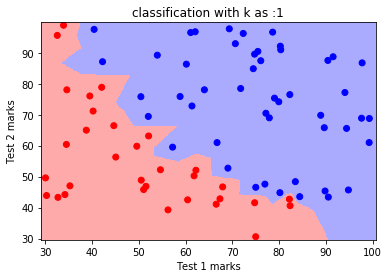

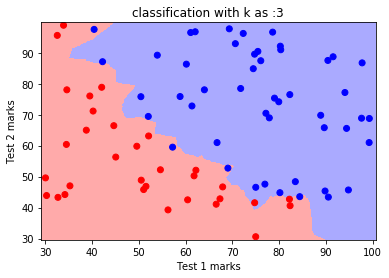

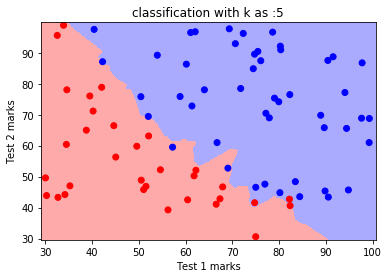

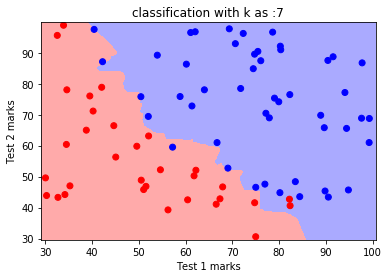

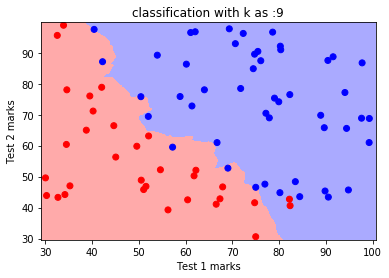

In [15]:
for i in range(1, 10, 2):
    plot_decision_boundary(i)

## Model Evaluation

In [16]:
def plot_confusion_matrix(cm, 
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 6  2]
 [ 0 12]]


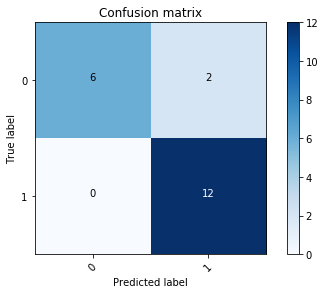

In [17]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_val_preds = knn.predict(x_val)

cnf_matrix = confusion_matrix(y_val, y_val_preds)

plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=["0", "1"],
                      title='Confusion matrix')

In [18]:
y_val_preds = knn.predict(x_val)
print(classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.86      1.00      0.92        12

    accuracy                           0.90        20
   macro avg       0.93      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20

